In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import STL
from scipy import signal
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn_pandas import gen_features
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [13]:
df = pd.read_csv("day.csv")

In [14]:
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [16]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [17]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [18]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f'Унікальні значення для стовбця "{column}": {unique_values}')

Унікальні значення для стовбця "instant": [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 

Булеві - yr, holiday, workingday
Категоріальні - season, weekday, weathersit

тест Діккі-Фуллера

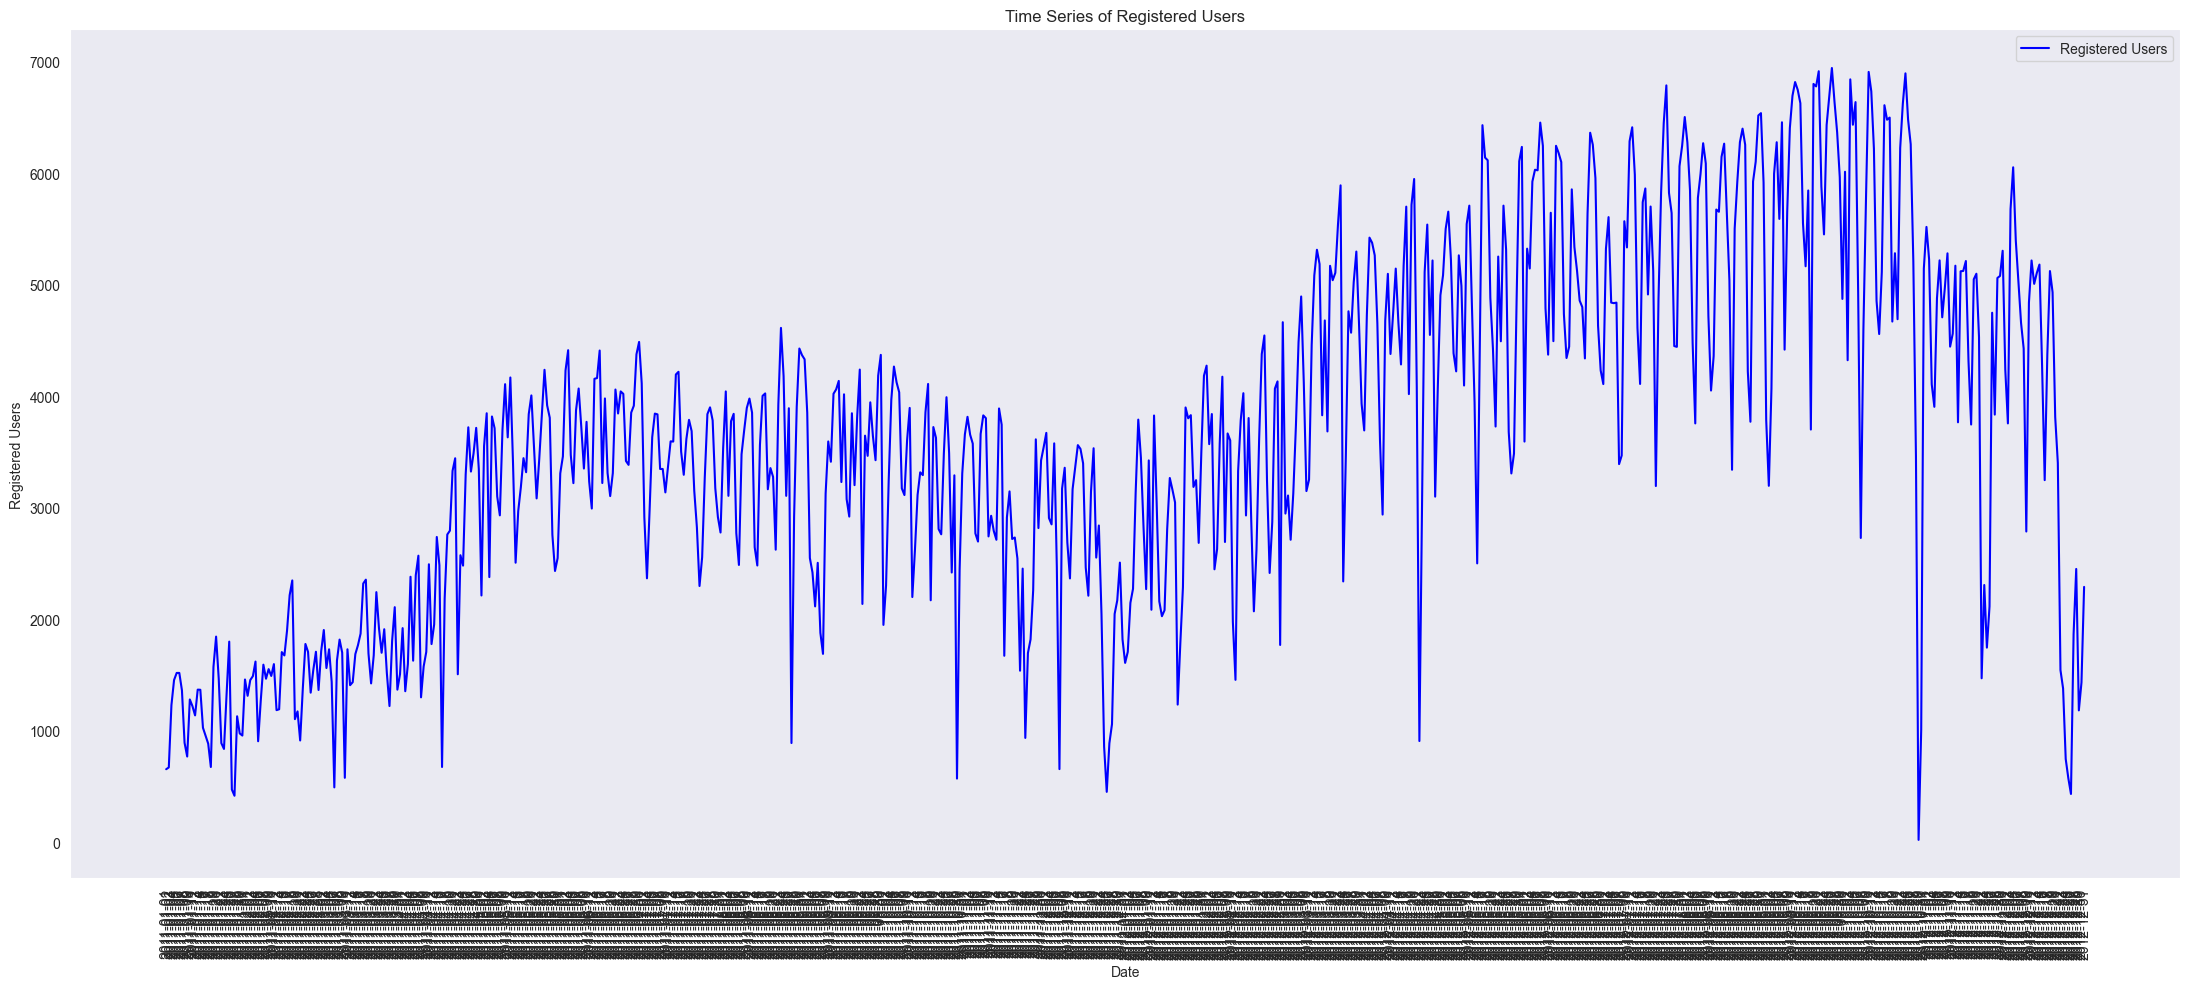

{'ADF Statistic': np.float64(-1.8510673314876487),
 'p-value': np.float64(0.3554187954361645),
 'Critical Values': {'1%': np.float64(-3.439593802573824),
  '5%': np.float64(-2.865619356068967),
  '10%': np.float64(-2.568942332870462)}}

In [19]:

adf_test = adfuller(df['registered'])


plt.figure(figsize=(22, 10))
plt.plot(df['dteday'], df['registered'], label='Registered Users', color='blue')
plt.xlabel('Date')
plt.ylabel('Registered Users')
plt.title('Time Series of Registered Users')
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.legend()
plt.show()

adf_test_results = {
    "ADF Statistic": adf_test[0],
    "p-value": adf_test[1],
    "Critical Values": adf_test[4]
}
adf_test_results

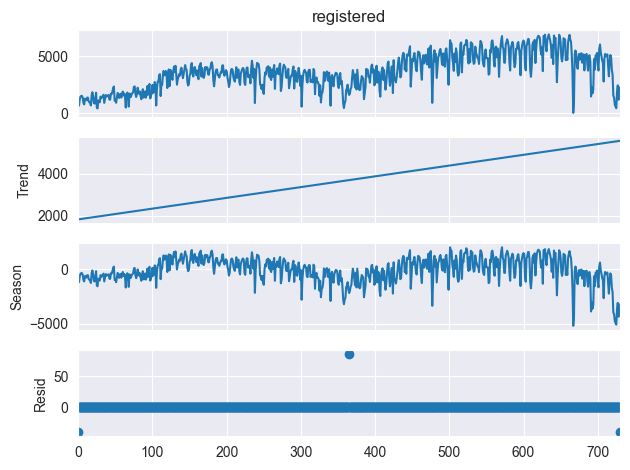

In [20]:
decompose_result = STL(df['registered'], period=365).fit()

decompose_result.plot()
plt.show()


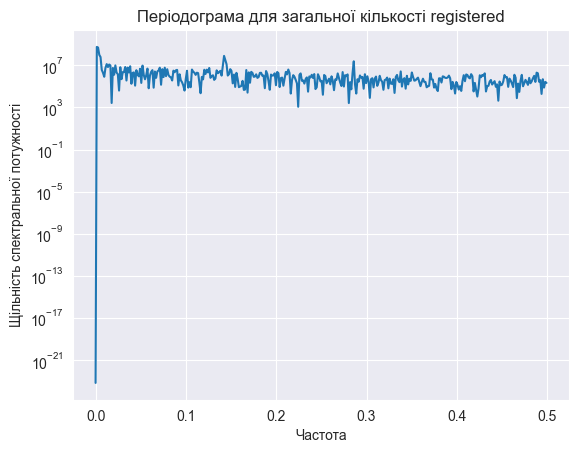

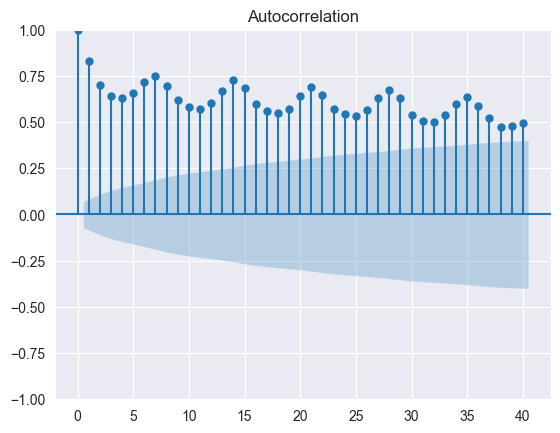

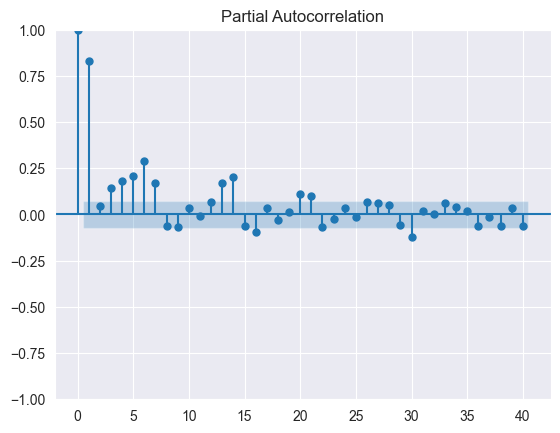

In [21]:

f, Pxx_den = signal.periodogram(df['registered'])
plt.semilogy(f, Pxx_den)
plt.title('Періодограма для загальної кількості registered')
plt.xlabel('Частота')
plt.ylabel('Щільність спектральної потужності')
plt.show()


plot_acf(df['registered'], lags=40)
plot_pacf(df['registered'], lags=40)
plt.show()


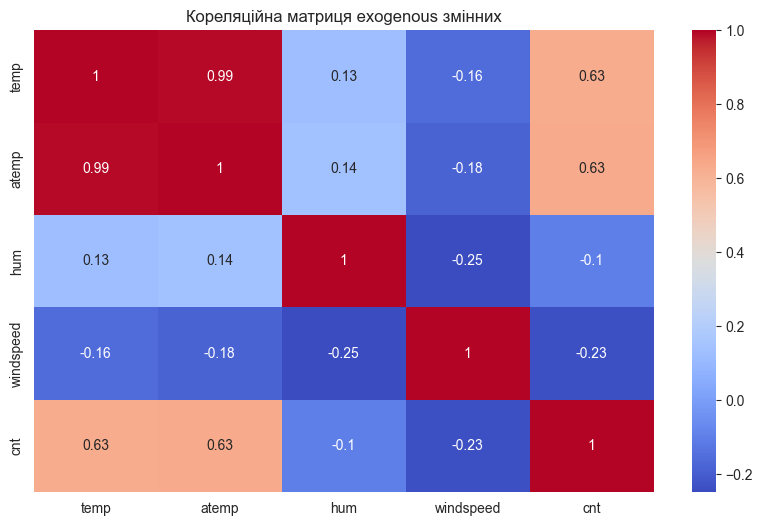

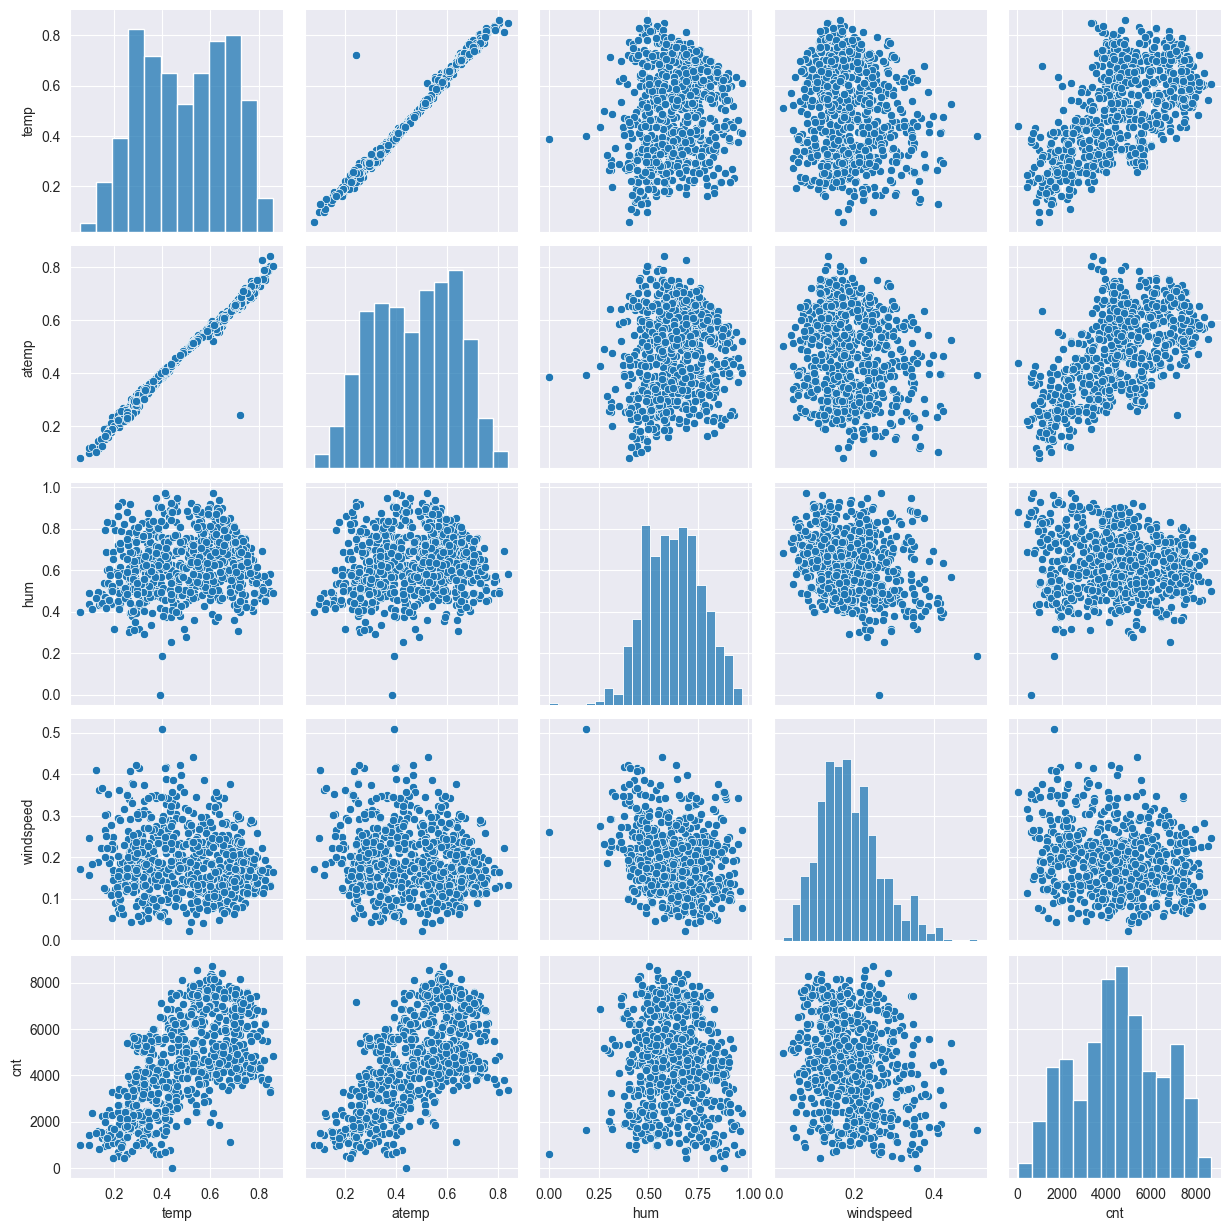

In [22]:
# Кореляційна матриця
corr_matrix = df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()

# Візуалізація кореляційної матриці
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Кореляційна матриця exogenous змінних')
plt.show()

# Візуалізація зв'язків exogenous змінних із кількістю оренд
sns.pairplot(df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']])
plt.show()


In [23]:
df['dteday'] = pd.to_datetime(df['dteday'])
df.set_index('dteday', inplace=True)
df['day_of_year'] = df.index.dayofyear

In [24]:
X = df.drop(['registered'], axis=1)
y = df['registered']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season', 'mnth', 'weekday', 'weathersit', 'day_of_year']
features = ['yr', 'workingday', 'holiday', 'casual', 'cnt', 'instant']
all_features = features + categorical_features

numerical_features = gen_features(
    columns=[[col] for col in numeric_features],
    classes=[
        {'class': StandardScaler}
    ]
)

# categorical_transformations = gen_features(
#     columns=[[col] for col in categorical_features],
#     classes=[OneHotEncoder]
# )
features_trans = gen_features(
    columns=[[col] for col in all_features]
)

mapper = DataFrameMapper(
  numerical_features + features_trans, df_out= True, default=False)

X_train_prepr = mapper.fit_transform(X_train)
X_test_prepr = mapper.transform(X_test)

G:\Ilya\TML\.venv\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function tosequence is deprecated; tosequence was deprecated in 1.5 and will be removed in 1.7
  warnings.warn(msg, category=FutureWarning)


In [25]:
X_train

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,cnt,day_of_year
dteday,,,,,,,,,,,,,,,
2012-11-13,683,4,1,11,0,2,1,2,0.343333,0.323225,0.662917,0.342046,327,4094,318
2011-09-08,251,3,0,9,0,4,1,3,0.633913,0.555361,0.939565,0.192748,153,1842,251
2011-12-03,337,4,0,12,0,6,0,1,0.299167,0.310604,0.612917,0.095783,706,3614,337
2011-09-18,261,3,0,9,0,0,0,1,0.507500,0.490537,0.695000,0.178483,1353,4274,261
2012-06-27,544,3,1,6,0,3,1,1,0.697500,0.640792,0.360000,0.271775,1077,7335,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-03-13,72,1,0,3,0,0,0,1,0.384348,0.380091,0.527391,0.270604,982,2417,72
2011-04-17,107,2,0,4,0,0,0,1,0.456667,0.445696,0.479583,0.303496,1558,3744,107
2011-09-28,271,4,0,9,0,3,1,2,0.635000,0.575158,0.848750,0.148629,480,3907,271


In [26]:
X_train_prepr

,temp,atemp,hum,windspeed,yr,workingday,holiday,casual,cnt,instant,season,mnth,weekday,weathersit,day_of_year
dteday,,,,,,,,,,,,,,,
2012-11-13,-0.864610,-0.961525,0.223424,1.957045,1,1,0,327,4094,683,4,11,2,2,318
2011-09-08,0.737288,0.475581,2.171018,0.026719,0,1,0,153,1842,251,3,9,4,3,251
2011-12-03,-1.108087,-1.039659,-0.128574,-1.226972,0,0,0,706,3614,337,4,12,6,1,337
2011-09-18,0.040404,0.074269,0.449288,-0.157718,0,0,0,1353,4274,261,3,9,0,1,261
2012-06-27,1.087829,1.004466,-1.909102,1.048487,1,1,0,1077,7335,544,3,6,3,1,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-03-13,-0.638504,-0.609479,-0.730675,1.033346,0,0,0,982,2417,72,1,3,0,1,72
2011-04-17,-0.239827,-0.203333,-1.067242,1.458618,0,0,0,1558,3744,107,2,4,0,1,107
2011-09-28,0.743281,0.598140,1.531683,-0.543711,0,1,0,480,3907,271,4,9,3,2,271


In [27]:
(X_train_prepr.shape, X_test_prepr.shape, y_train.shape, y_test.shape)

((584, 15), (147, 15), (584,), (147,))

In [28]:
df['time_index'] = np.arange(len(df))
X_train['time_index'] = df.loc[X_train.index, 'time_index']
X_test['time_index'] = df.loc[X_test.index, 'time_index']

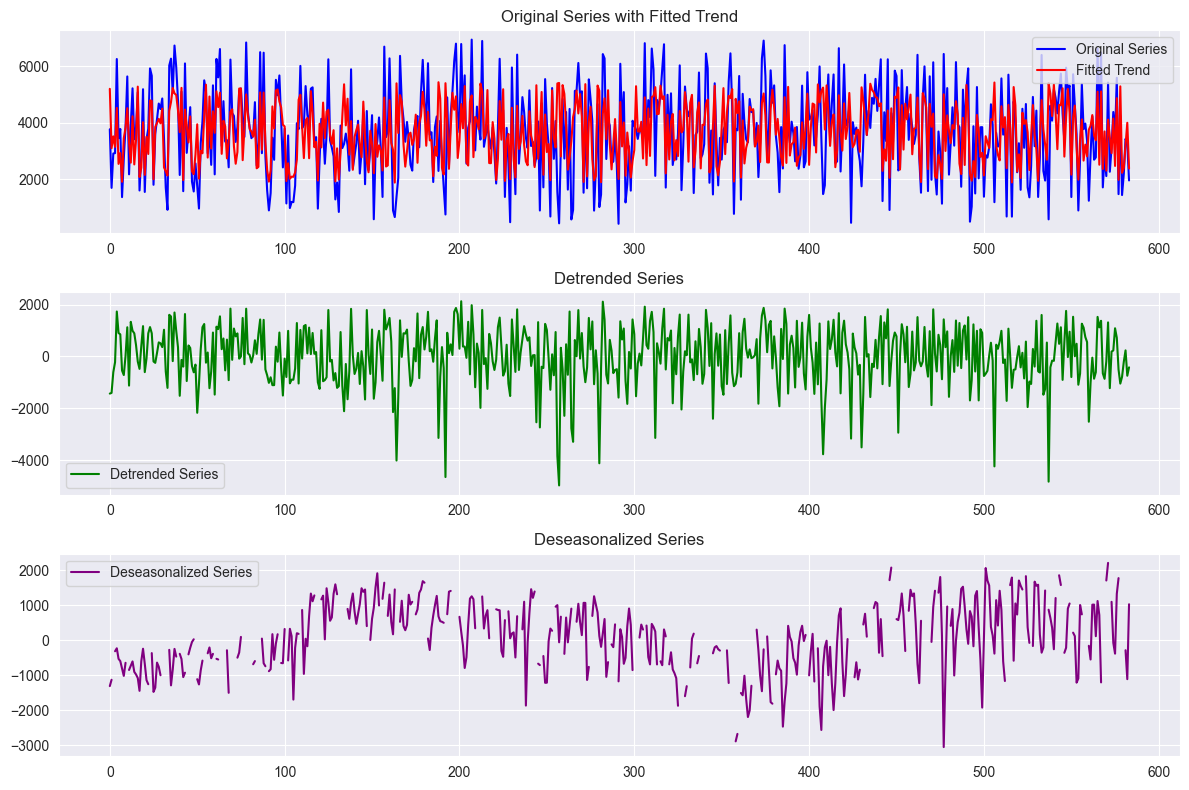

In [29]:

trend_model_full = LinearRegression()
trend_model_full.fit(X_train[['time_index']], y_train)

decomposition_full = seasonal_decompose(df['registered'], model='additive', period=30)

seasonal_component_full = decomposition_full.seasonal[:len(y_train)]

df['time_index'] = np.arange(len(df))
trend_model_full = LinearRegression()
trend_model_full.fit(df[['time_index']], df['registered'])

trend_pred_train_full = trend_model_full.predict(X_train[['time_index']])

y_train_detrended_full = y_train - trend_pred_train_full
y_train_deseasonalized_full = y_train_detrended_full - seasonal_component_full

plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(y_train.values, label='Original Series', color='blue')
plt.plot(trend_pred_train_full, label='Fitted Trend', color='red')
plt.title('Original Series with Fitted Trend')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(y_train_detrended_full.values, label='Detrended Series', color='green')
plt.title('Detrended Series')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(y_train_deseasonalized_full.values, label='Deseasonalized Series', color='purple')
plt.title('Deseasonalized Series')
plt.legend()

plt.tight_layout()
plt.show()

Провести лише десезонинацію, та побудувати модель для передбачення очищеного рядку.

In [30]:
decomposition = seasonal_decompose(df['registered'], model='additive', period=30)

seasonal_component = decomposition.seasonal

df['registered_deseasonalized'] = df['registered'] - seasonal_component

X = df.drop(['registered', 'registered_deseasonalized'], axis=1)
y = df['registered_deseasonalized']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(mse)

36264.757292325565


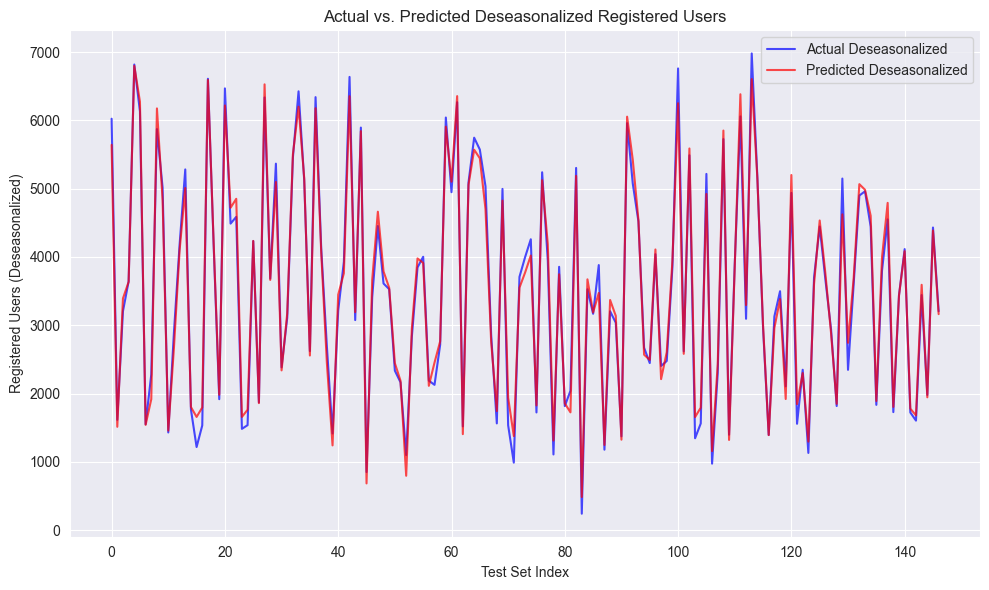

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Deseasonalized', color='blue', alpha=0.7)
plt.plot(y_pred, label='Predicted Deseasonalized', color='red', alpha=0.7)
plt.title('Actual vs. Predicted Deseasonalized Registered Users')
plt.xlabel('Test Set Index')
plt.ylabel('Registered Users (Deseasonalized)')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


Побудувати одну модель для передбачення часового ряду (з exogenous та endogenous змінним);

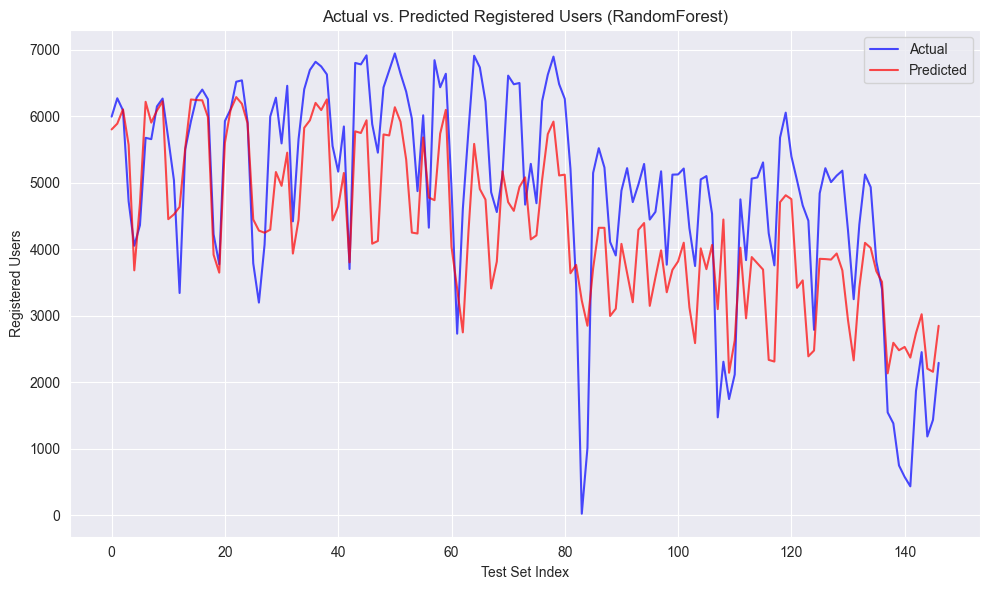

1211762.2264897958


In [32]:
y = df['registered']

exog_features = df[['temp', 'atemp', 'hum', 'windspeed', 'season', 'yr', 'workingday', 'holiday', 'weathersit']]

y_train, y_test = train_test_split(y, test_size=0.2, random_state=42, shuffle=False)
exog_train, exog_test = train_test_split(exog_features, test_size=0.2, random_state=42, shuffle=False)

rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(exog_train, y_train)

y_rf_pred = rf_model.predict(exog_test)

mse_rf = mean_squared_error(y_test, y_rf_pred)

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue', alpha=0.7)
plt.plot(y_rf_pred, label='Predicted', color='red', alpha=0.7)
plt.title('Actual vs. Predicted Registered Users (RandomForest)')
plt.xlabel('Test Set Index')
plt.ylabel('Registered Users')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

print(mse_rf)

Використовуючи моделі ARIMA або SARIMAX (при навчанні SARIMA моделі використання exogenous змінних можу експоненційно збільшити час навчання).

G:\Ilya\TML\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
G:\Ilya\TML\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


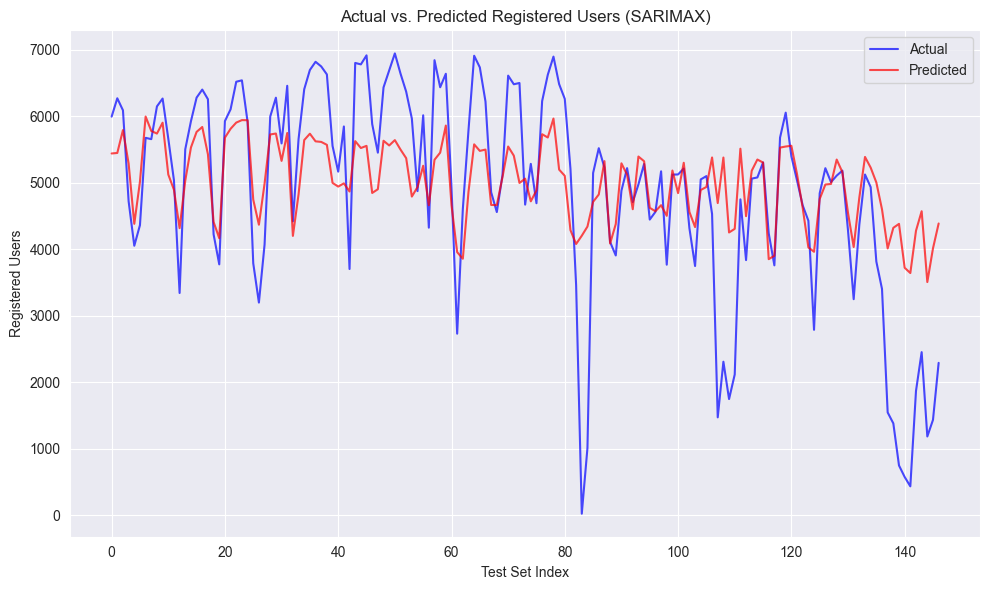

1361559.287843017


In [33]:
y = df['registered']
    
exog_features = df[['temp', 'atemp', 'hum', 'windspeed', 'season', 'yr', 'workingday', 'holiday', 'weathersit']]
    
y_train, y_test = train_test_split(y, test_size=0.2, random_state=42, shuffle=False)
exog_train, exog_test = train_test_split(exog_features, test_size=0.2, random_state=42, shuffle=False)
   
model = SARIMAX(y_train, exog=exog_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)
    
y_pred = model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog=exog_test)
    
mse_sarimax = mean_squared_error(y_test, y_pred)
    
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue', alpha=0.7)
plt.plot(y_pred.values, label='Predicted', color='red', alpha=0.7)
plt.title('Actual vs. Predicted Registered Users (SARIMAX)')
plt.xlabel('Test Set Index')
plt.ylabel('Registered Users')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

print(mse_sarimax)